# **Sentiment Analysis for IMDb movies 🍿👀📽**

In this project, I perform sentiment analysis on IMDb movies' reviews. Firstly, I do data analysis, while I experiment with 2 data preprocessing techniques, which are **Bag of Words**, **TF-IDF** and plot my results on them. In addition, I classify the reviews into two classes (Positive and Negative) using logistic regression and I provide a detailed comparison for each method I experimented with. 

---



In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## **Load the dataset** 

Connect google drive where I store the data

In [5]:
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/AI_2_exercise_1_data/imdb-reviews.csv"
df = pd.read_csv(filepath_or_buffer=DATA_PATH, sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A look at our data

In [6]:
print(f"Dataset shape: {df.shape}")
pd.set_option('display.max_colwidth', 1000)
df.head()

Dataset shape: (45008, 3)


,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was fun to watch it. What I liked best where the 'Outtakes' at the end of the movie. They were GREAT.
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,"Wagon Master is a very unique film amongst John Ford's work. Mainly because it's the only one that is based on a story written by John Ford himself, the story that was elaborated by Frank Nugent and director's son  Patrick Ford and turned into a screenplay, and because of director's personal opinion regarding it, Wagon Master is the film John Ford called the one which `came closest to being what I had wanted to achieve', to say so is not to say a little, but as Ford confessed once to Lindsay Anderson, his favourite was nonetheless My Darling Clementine and not any other.<br /><br /> Wagon Master has all ingredients one might expect to find in a John Ford's film. Wonderful cast delivering his best, thou not featuring any major stars, except the most `fordian' of all actors  Ben Johnson. Very peculiar small characters, who provide an obligatory comic relief, and Wagon Master has quite a few of them such as horn blowing Sister Ledyard (Jane Darwell) in her shot but very inspired gig..."
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,"This film has to be as near to perfect a film as John Ford made. The film is magic, a masterpiece, the reason Ford was, well Ford. If you want to know why Ford was great this one explains it.<br /><br />The photography of course is superb, black and white as black and white should be, wonderful shots, not an over the shoulder conversation in it, pure Ford, great moments, big and little. The famous ripped pants of Ward Bond. Apparently two dogs kept invading the set and fighting so Ford wanted to use them in the fighting scene, but instead of fighting one dog ran away and the other attacked Ward Bond and ripped his pants, which caused Ford no end of mirth. A whole scene around plaiting a rope. The way Ben Johnson burn then snuffs his rope, wonderful foreshadowing and anticipation of the final. Harry Carey's naive courting of Prudence. The usual ford line about being scared and not showing it. Bond's horse accidentally falling in him and its left in the film. Johnson and Bond are fan..."
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,"I gave this 4 stars because it has a lot of interesting themes many here have already mentioned. From the domestic violence, to sexuality and many of the taboos therein. Outside of the gore I really would not call this horror so much as I would science fiction.<br /><br />It's bleak, depressing and hopeless. While I don't mind a less than cheery ending, I'm really very tired of the ""humans suck"" cliché that's central to every movie. I know you can't get a liberal arts degree today without bowing to the alter of self-hatred as a member of the human race, but how's 'bout as a writer/director we pretend we are different than everyone else in the pack and notice that the ALIENS KILLING THE HUMAN RACE are evil! Right now, if you are reading this and believe that humanity deserves to die, just go out, find a lake and swim 'til your arms are tired. This way you won't be around to direct the next film or write the next book telling me I deserve to die for being alive. It's silly, not thoug..."
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,"This movie is really genuine and random. It's really hard to find movies like it in bunches of movies now in Hollywood. I really enjoy watching this movie, i bought its DVD Tuesday this week and i've watched it for 4 times. I love the Spanglish accent of Paz, it s just really cute as she is. And her acting and Morgan's are so funny and natural.<br /><br />My movie taste might be really different from others but i have to say i really love this movie, the simple is the best!<br /><br />I've learned something more about life from this movie (well

Convert the sentiments as following:

* POS → 0
* NEG → 1

In [7]:
 df.loc[df['rating'] < 5, ['rating']] = 0
 df.loc[df['rating'] > 6, ['rating']] = 1

## **Data pre-processing**

In order to aply logistic regression in the data, they must first be pre-processed.

### **Text Transformation**

We detect no missing values in the dataset

In [8]:
print(df.isnull().sum())

url       0
rating    0
review    0
dtype: int64


In [9]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

# Define the function for text transformation
def text_transformation(text):
  # Lower characters
  text = text.lower()
  # Remove links
  text = re.sub('http://\S+|https://\S+', '', text)
  # Remove non letter characters
  text = re.sub(r'[^A-Za-z]+', ' ', text)
  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Remove stopwords
  StopWords = stopwords.words("english")
  text = ' '.join([word for word in text.split() if word not in StopWords])
  # Lemmatization
  snow_stemmer = SnowballStemmer(language='english')
  text = ' '.join([snow_stemmer.stem(word) for word in text.split()])
  
  return text  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df['review'] = df['review'].apply(text_transformation)

In [11]:
df.head()

,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,1.0,thought quiet good movi fun watch like best outtak end movi great
1,http://www.imdb.com/title/tt0043117/usercomments,1.0,wagon master uniqu film amongst john ford work main one base stori written john ford stori elabor frank nugent director son patrick ford turn screenplay director person opinion regard wagon master film john ford call one came closest want achiev say say littl ford confess lindsay anderson favourit nonetheless darl clementin br br wagon master ingredi one might expect find john ford film wonder cast deliv best thou featur major star except fordian actor ben johnson peculiar small charact provid obligatori comic relief wagon master quit horn blow sister ledyard jane darwel shot inspir gig last least legendari monument valley john ford fifth passag stagecoach darl clementin fort apach wore yellow ribbon br br film start two friend cowboy travi blue ben johnson sandi owen harri carey jr hire wagon master guid caravan mormon settler head silver valley place like promis land way join peculiar dr locksley hall alan mowbray two beauti women suppos wife daughter call actor head direct simpl...
2,http://www.imdb.com/title/tt0043117/usercomments,1.0,film near perfect film john ford made film magic masterpiec reason ford well ford want know ford great one explain br br photographi cours superb black white black white wonder shot shoulder convers pure ford great moment big littl famous rip pant ward bond appar two dog kept invad set fight ford want use fight scene instead fight one dog ran away attack ward bond rip pant caus ford end mirth whole scene around plait rope way ben johnson burn snuff rope wonder foreshadow anticip final harri carey naiv court prudenc usual ford line scare show bond hors accident fall left film johnson bond fantast scene lord help ford actor stay charact camera roll even hors fall top br br coupl sweet romanc intrud whole focus two likabl lead mention girl number time camera focus ben johnson rather delight backsid br br lot old time stuntmen get line role cliff lyon frank mcgrath wonder charact studi most face stare villain main star set villain rival group western br br mani mani fordian shot face g...
3,http://www.imdb.com/title/tt0835204/usercomments,0.0,gave star lot interest theme mani alreadi mention domest violenc sexual mani taboo therein outsid gore realli would call horror much would scienc fiction br br bleak depress hopeless mind less cheeri end realli tire human suck clich central everi movi know get liber art degre today without bow alter self hatr member human race bout writer director pretend differ everyon els pack notic alien kill human race evil right read believ human deserv die go find lake swim til arm tire way around direct next film write next book tell deserv die aliv silli thought bore
4,http://www.imdb.com/title/tt0499603/usercomments,1.0,movi realli genuin random realli hard find movi like bunch movi hollywood realli enjoy watch movi bought dvd tuesday week watch time love spanglish accent paz realli cute act morgan funni natur br br movi tast might realli differ other say realli love movi simpl best br br learn someth life movi well least usa life life realli random sometim u meet someon pass life friend coincid u spend much time mayb u enjoy u never meet time u togeth realli unforgett keep moment mind grate nice memori br br movi might cheap make price mean total cheap rare learn anyth movi except


### **Data Analysis**

In this section, we will take a deep look at our data and with the help of some graphs we will try to draw some meaningful conclusions about the data.

#### **Sentiment Distribution**

We observe that there is a balanced distribution as far as the feeling is concerned

<ipython-input-12-b4766f8f34bf>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([pos,neg], labels = ["Positive", "Negative"], title = "Sentiment",


Text(0.5, 1.0, 'Sentiment distribution on movies')

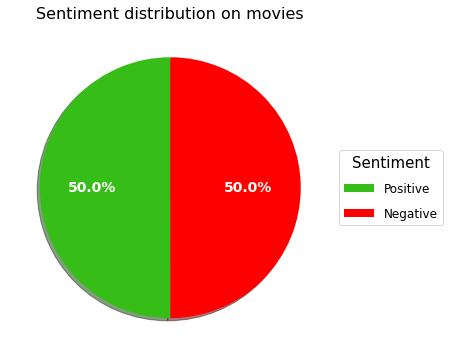

In [12]:
pos, neg = df.rating.value_counts()

fig, ax = plt.subplots(figsize=(6,6))
colors = ['#36BD17', '#FF0000']

wedges, texts, autotexts = ax.pie([pos,neg], autopct='%1.1f%%', shadow=True,colors=colors, startangle=90, textprops=dict(color="w"))
ax.legend([pos,neg], labels = ["Positive", "Negative"], title = "Sentiment", 
              loc = "center left", bbox_to_anchor=(1, 0, 0.5, 1), handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14, weight="bold")
ax.set_title("Sentiment distribution on movies", size=16)

#### **Most Frequent Words**

The ten most frequent words and their frequencies
among all the reviews

In [13]:
from collections import Counter

most_common_words = Counter(" ".join(df["review"]).split()).most_common(1000)

most_common_df = pd.DataFrame(most_common_words[:10])
most_common_df = most_common_df.iloc[1:,:]

most_common_df.columns = ['Common_Word','Frequency']
display(most_common_df.style.background_gradient(cmap='Blues'))

,Common_Word,Frequency
1,movi,95763
2,film,87345
3,one,50244
4,like,41218
5,time,28937
6,make,27437
7,good,27416
8,charact,25840
9,see,25739


#### **Most Frequent Words On Positive Reviews** 

The ten most frequent words and their frequencies
among positive reviews.

In [14]:
positive_dataset = df[df.rating == 1]
positive_most_common = Counter(' '.join(positive_dataset['review']).split()).most_common(11)

pos_most_common_df = pd.DataFrame(positive_most_common)
pos_most_common_df = pos_most_common_df.iloc[1:,:]

pos_most_common_df.columns = ['Pos_Common_Word','Frequency']
display(pos_most_common_df.style.background_gradient(cmap='Greens'))

,Pos_Common_Word,Frequency
1,film,46521
2,movi,41820
3,one,25685
4,like,18775
5,time,15070
6,good,13841
7,see,13804
8,stori,12924
9,charact,12827
10,make,12625


#### **Most Frequent Words On Negative Reviews** 

The ten most frequent words and their frequencies among negative reviews.

In [15]:
negative_dataset = df[df.rating == 0]
negative_most_common = Counter(' '.join(negative_dataset['review']).split()).most_common(11)

neg_most_common_df = pd.DataFrame(negative_most_common)
neg_most_common_df = neg_most_common_df.iloc[1:,:]
neg_most_common_df.columns = ['Neg_Common_Word','Frequency']
display(neg_most_common_df.style.background_gradient(cmap='Reds'))

,Neg_Common_Word,Frequency
1,movi,53943
2,film,40824
3,one,24559
4,like,22443
5,make,14812
6,bad,14610
7,even,14112
8,time,13867
9,get,13859
10,watch,13648


#### **Sentiment Distibution On Movies With The Highest Number Of Ratings**

Examine the sentiment distibution on the first 
ten movies with the highest number of ratings

In [16]:
movie_to_freq_dict = {}
for url in df['url']:
  frequency = movie_to_freq_dict.get(url)
  if(frequency == None):
    movie_to_freq_dict[url] = 1
  else:
    movie_to_freq_dict[url] = frequency + 1
print("No of movies in dataset: " + str(len(movie_to_freq_dict)))

No of movies in dataset: 5057


In [17]:
sorted_movies_by_freq = sorted(movie_to_freq_dict.items(), key=lambda x:x[1], reverse = True)
newstr = sorted_movies_by_freq[0][0].replace("http://www.imdb.com/title/", "")
newstr = newstr.replace("/usercomments","")

In [18]:
sub_url = []
pos_reviews = []
neg_reviews = []
for i in range(0,10):
  url, freq = sorted_movies_by_freq[i]
  url_pos =  df[(df['url'] == url) & (df['rating'] == 1)].shape[0]
  url_neg = freq - url_pos
  pos_reviews.append(url_pos)
  neg_reviews.append(url_neg)
  url = url.replace("http://www.imdb.com/title/", "")
  url = url.replace("/usercomments","")
  sub_url.append(url)

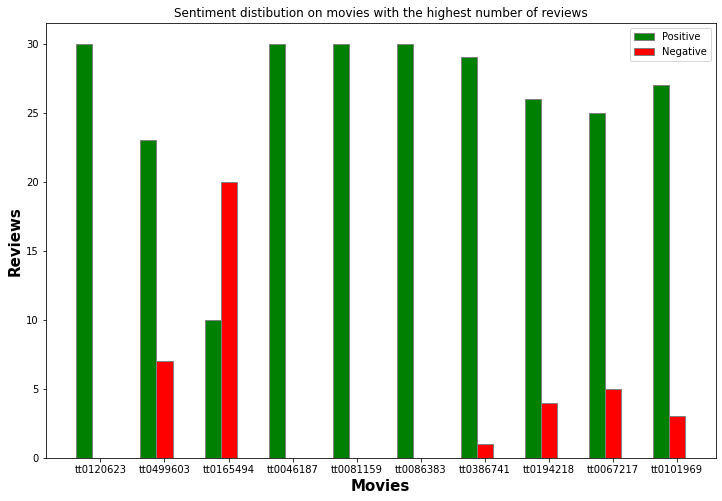

In [19]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(sub_url))
br2 = [x + barWidth for x in br1]

plt.bar(br1, pos_reviews, color ='g', width = barWidth,
        edgecolor ='grey', label ='Positive')
plt.bar(br2, neg_reviews, color ='r', width = barWidth,
        edgecolor ='grey', label ='Negative')

plt.xlabel('Movies', fontweight ='bold', fontsize = 15)
plt.ylabel('Reviews', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(sub_url))],
        sub_url)
plt.title("Sentiment distibution on movies with the highest number of reviews")

plt.legend()
plt.show()

### **Text Encoding**

In [20]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
scoring = {'acc' : 'accuracy',
          'prec_macro': 'precision_macro',
          'rec_macro': 'recall_macro',
          'f1_macro' : 'f1_macro'}


cv = KFold(n_splits=5, random_state=1, shuffle=True)

Model for experiments

In [22]:
classifier = LogisticRegression(random_state = 0, n_jobs = -1)

In [24]:
def plot_metrics_per_parameter(parameter_list, f1_list, prec_list, recall_list, title):

  fig = plt.figure(figsize=(12, 8))

  sub1 = fig.add_subplot(311) 
  sub1.set_title('F1') 
  sub1.plot(parameter_list, f1_list)

  sub2 = fig.add_subplot(312)
  sub2.set_title('Precision')
  sub2.plot(parameter_list, prec_list)

  sub3 = fig.add_subplot(313)
  sub3.set_title('Recall')
  sub3.plot(parameter_list, recall_list)

  fig.suptitle(title)
  
  plt.show()

#### **Bag of Words**

The bag-of-words model uses the frequency of occurrence of each word as a feature

Data vectorization using the **Bag of Words (BoW)** method experimenting with the max_feature parameter based on precision, recall, f1 metrics. The purpose of max features is to limit the
number of features (words) from the dataset for which we want to calculate the
scores. This is done by choosing the features based on term frequency across the
corpus

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_prec_list = []
bow_recall_list = []
bow_f1_list = []
maxFeatureList = [100,200,300,400,500,600,700,800,900,1000]
for cur_max_feature in maxFeatureList:
  bow_vectorizer = CountVectorizer(min_df=1, max_features=cur_max_feature, stop_words='english')
  bow_vectors = bow_vectorizer.fit_transform(df['review'])
  bow_vectors = bow_vectors.toarray()
  X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(bow_vectors, df['rating'], test_size=0.2, random_state=42)
  classifier.fit(X_train_bow, Y_train_bow)
  regression_with_bow = cross_validate(classifier, X_test_bow, Y_test_bow, scoring=scoring, cv=cv, n_jobs=-1)

  bow_precision = mean(regression_with_bow['test_prec_macro'])
  bow_recall = mean(regression_with_bow['test_rec_macro'])
  bow_f1 = mean(regression_with_bow['test_f1_macro'])
  
  bow_f1_list.append(bow_f1)
  bow_prec_list.append(bow_precision)
  bow_recall_list.append(bow_recall)


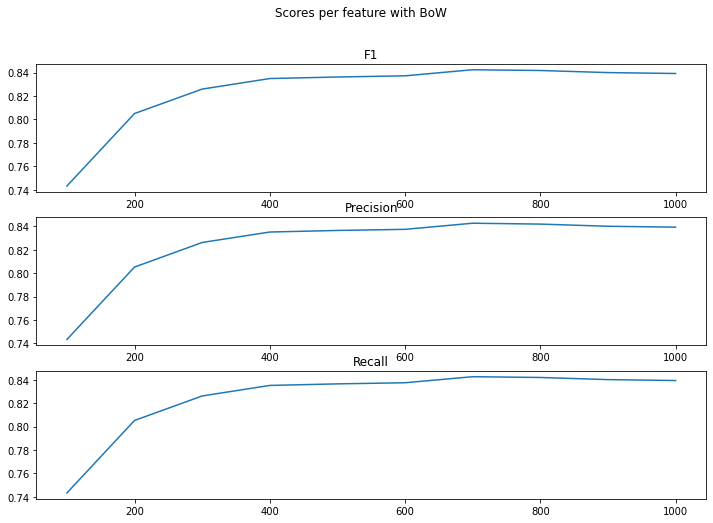

In [27]:
plot_metrics_per_parameter(parameter_list=maxFeatureList, f1_list=bow_f1_list, prec_list=bow_prec_list, recall_list=bow_recall_list, title="Scores per feature with BoW")

It seems that 700 is the ideal numbers of features to use

In [28]:
bow_vectorizer = CountVectorizer(min_df=1, max_features=700, stop_words='english')
bow_vectors = bow_vectorizer.fit_transform(df['review'])
bow_vectors = bow_vectors.toarray()  

In [29]:
print(bow_vectors.shape)
print(bow_vectors)

(45008, 700)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 2 ... 0 1 0]]


#### **TF-IDF**

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general

Data vectorization using the **Term Frequency - Inverse Document Frequency** **(TF-IDF)** method, experimenting with the max_features parameter based on precision, recall, f1 metrics

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tf_idf_fit_time_list = []
tf_idf_prec_list = []
tf_idf_recall_list = []
tf_idf_f1_list = []

maxFeatureList = [100,200,300,400,500,600,700,800,900,1000]
for cur_max_feature in maxFeatureList:
  tfidf_vectorizer = TfidfVectorizer(min_df=1, max_features = cur_max_feature, stop_words='english')
  tfidf_vectors = tfidf_vectorizer.fit_transform(df['review'])
  tfidf_vectors = tfidf_vectors.toarray()
  X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(tfidf_vectors, df['rating'], test_size=0.2, random_state=42)
  classifier.fit(X_train_tfidf, Y_train_tfidf)
  regression_with_tfidf = cross_validate(classifier, X_test_tfidf, Y_test_tfidf, scoring=scoring, cv=cv, n_jobs=-1)

  precision = mean(regression_with_tfidf['test_prec_macro'])
  recall = mean(regression_with_tfidf['test_rec_macro'])
  f1 = mean(regression_with_tfidf['test_f1_macro'])
  
  tf_idf_f1_list.append(f1)
  tf_idf_prec_list.append(precision)
  tf_idf_recall_list.append(recall)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


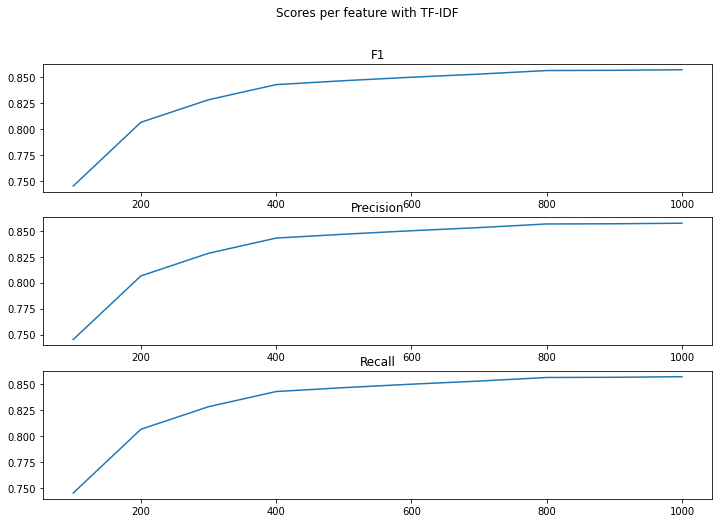

In [32]:
plot_metrics_per_parameter(parameter_list = maxFeatureList, f1_list = tf_idf_f1_list, prec_list =  tf_idf_prec_list, recall_list=tf_idf_recall_list, title = "Scores per feature with TF-IDF")

It seems that 800 is the ideal number of features to use

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=1, max_features=800, stop_words='english')
tfidf_vectors = tfidf_vectorizer.fit_transform(df['review'])
tfidf_vectors = tfidf_vectors.toarray()

In [34]:
print(tfidf_vectors.shape)
print(tfidf_vectors)

(45008, 800)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.0893428  ... 0.         0.         0.        ]
 [0.16882215 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.04271397 0.        ]]


### **Dataset Split**

Experimenting with the data rate ploting learning curves to check for underfitting or overfitting in our model based in misclassification error (1 - accuracy score)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
total_rows = df.shape[0]

In [37]:
def plot_learn_curves(learning_factor, train_res, val_res, xlabel, ylabel):  
  fig = plt.figure(figsize=(6, 4))

  plt.plot(learning_factor, train_res)
  plt.plot(learning_factor, val_res)
  plt.title("Learning Curves")
  plt.legend(['Training', 'Validation'])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.tight_layout()
  plt.show()

In [38]:
from sklearn.metrics import accuracy_score

def mis_error_per_data_rate(encoded_vectors, data_rates, total_rows):
  data_sizes = [int(data_rate*total_rows) for data_rate in data_rates]
  train_size = int(0.8 * total_rows)
  
  X_train = encoded_vectors[0:train_size]
  X_val = encoded_vectors[train_size:total_rows]
  Y_train = df.iloc[0:train_size]['rating']
  Y_val = df.iloc[train_size:total_rows]['rating']

  train_mis_rate = []
  val_mis_rate = []

  for data_size in data_sizes:
    X_sub_train = X_train[0:data_size]
    Y_sub_train = Y_train.iloc[0:data_size]
    
    classifier = LogisticRegression(random_state = 0, n_jobs = -1)
    classifier.fit(X_sub_train, Y_sub_train)
  
    train_results = classifier.predict(X_sub_train)
    train_acc = accuracy_score(Y_sub_train, train_results)

    val_results = classifier.predict(X_val)  
    val_acc = accuracy_score(Y_val, val_results)

    train_mis_rate.append(1-train_acc)
    val_mis_rate.append(1-val_acc)
    
  return train_mis_rate, val_mis_rate

#### **Split BoW Vectors**

In [39]:
bow_train_mis_rate, bow_val_mis_rate = mis_error_per_data_rate(encoded_vectors=bow_vectors, data_rates=data_rates, total_rows=total_rows)

Training loss and
validation loss are close to each other with validation loss being slightly greater
than the training loss and after some point till the end we can see a pretty flat
training and validation loss

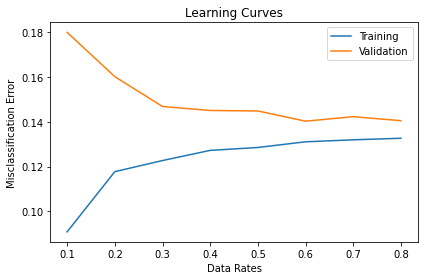

In [40]:
plot_learn_curves(learning_factor=data_rates, train_res=bow_train_mis_rate, val_res=bow_val_mis_rate, xlabel="Data Rates", ylabel="Misclassification Error")

Use 80% of data for training set and 20% for test set

In [41]:
# BoW data
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(bow_vectors, df['rating'], test_size=0.2, random_state=42)
print(f"X train BoW shape: {X_train_bow.shape}")

X train BoW shape: (36006, 700)


#### **Split TF-IDF Vectors**

In [42]:
tfidf_train_mis_rate, tfidf_val_mis_rate = mis_error_per_data_rate(encoded_vectors=tfidf_vectors, data_rates=data_rates, total_rows=total_rows)

Training loss and validation loss are close to each other with validation loss being slightly greater than the training loss and after some point till the end we can see a pretty flat training and validation loss

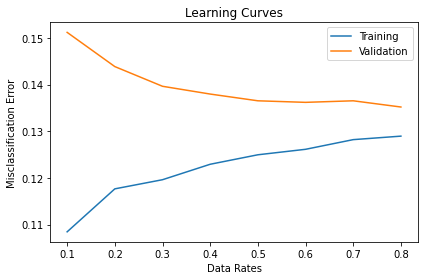

In [43]:
plot_learn_curves(learning_factor=data_rates, train_res=tfidf_train_mis_rate, val_res=tfidf_val_mis_rate, xlabel="Data Rates", ylabel="Misclassification Error")

Use 80% of data for training set and 20% for test set

In [44]:
# TF-IDF data
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(tfidf_vectors, df['rating'], test_size=0.2, random_state=42)
print(f"X train TF-IDF shape: {X_train_tfidf.shape}")

X train TF-IDF shape: (36006, 800)


## **Regression**

In [45]:
def plt_confusion_matrix(cf, title):
    blanks = ['' for i in range(cf.size)]
    group_labels = ['True Neg ','False Pos ','False Neg ','True Pos ']
    group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    figsize = plt.rcParams.get('figure.figsize')
    plt.figure(figsize=(12, 8))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap='binary',cbar=True,xticklabels = ['Zero', 'One'],yticklabels = ['Zero', 'One'])

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)

I use GridSearchCV for finding the optimal parameters of Logistic Regression.
As scoring metric I use the F1.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

## Define GridSearch parameters to try 
parameters = { 
    'solver' : ["newton-cg" ,"lbfgs" ,"liblinear" ],
    'penalty' : ["l1", "l2", "none"],
    'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

### **Regression with BoW**

Ignore the warnings due to the invalidation of some combinations of the parameters.

In [ ]:
## Grid Search function
bow_clf = GridSearchCV(estimator=LogisticRegression(max_iter=500, n_jobs = -1), param_grid=parameters, 
                  cv=cv, refit = 'f1_macro')
bow_clf.fit(X_train_bow, Y_train_bow)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

In [ ]:
print("\n Optimal parameters: \n", bow_clf.best_params_)
print("\n Maximum F1 score achieved: \n", bow_clf.best_score_)


 Optimal parameters: 
 {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

 Maximum F1 score achieved: 
 0.8559131011803298


Train the model using best hyperparameters

In [ ]:
bow_clf = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'lbfgs', max_iter= 500, n_jobs = -1)
bow_clf.fit(X_train_bow, Y_train_bow)

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

**Predict using best hyperparameters**

In [ ]:
regression_with_bow = cross_validate(bow_clf, X_test_bow, Y_test_bow, scoring=scoring, cv=cv, n_jobs=-1)

precision_bow = mean(regression_with_bow['test_prec_macro'])
recall_bow = mean(regression_with_bow['test_rec_macro'])
f1_bow = mean(regression_with_bow['test_f1_macro'])

In [ ]:
# report performance
print("PERFORMANCE METRICS with BoW\n")
print(f"Precision: {precision_bow*100:.2f}")
print(f"Recall: {recall_bow*100:.2f}")
print(f"F1 Score: {f1_bow*100:.2f}")

PERFORMANCE METRICS with BoW

Precision: 85.01
Recall: 85.01
F1 Score: 84.99


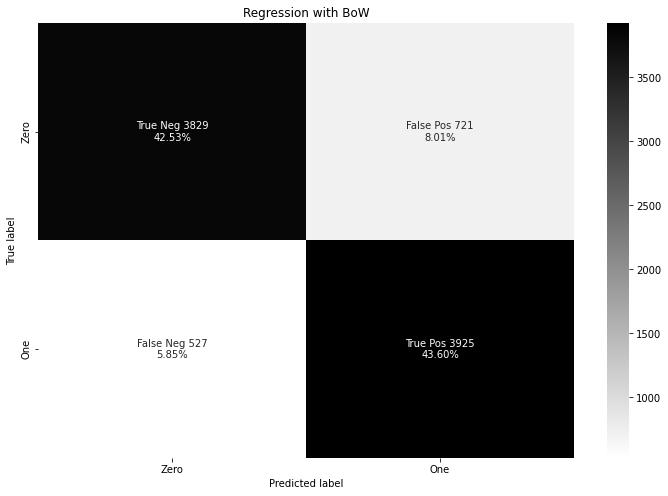

In [ ]:
Y_pred_bow = bow_clf.predict(X_test_bow)
cf_matrix_bow = confusion_matrix(Y_test_bow,Y_pred_bow)
plt_confusion_matrix(cf=cf_matrix_bow, title="Regression with BoW")

### **Regression with TF-IDF**

Ignore the warnings due to the invalidation of some combinations of the parameters.

In [ ]:
## Grid Search function
tfidf_clf = GridSearchCV(estimator=LogisticRegression(max_iter=500, n_jobs = -1), param_grid=parameters, 
                  cv=cv, refit = 'f1_macro')
tfidf_clf.fit(X_train_tfidf, Y_train_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

In [ ]:
print("\n Optimal parameters: \n", tfidf_clf.best_params_)
print("\n Maximum F1 score achieved: \n", tfidf_clf.best_score_)


 Optimal parameters: 
 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

 Maximum F1 score achieved: 
 0.8609677811341039


Train the model using best hyperparameters

In [ ]:
tfidf_clf = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
tfidf_clf.fit(X_train_tfidf, Y_train_tfidf)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

**Predict using best hyperparameters**

In [ ]:
regression_with_tfidf = cross_validate(tfidf_clf, X_test_tfidf, Y_test_tfidf, scoring=scoring, cv=cv, n_jobs=-1)
precision_tfidf = mean(regression_with_tfidf['test_prec_macro'])
recall_tfidf = mean(regression_with_tfidf['test_rec_macro'])
f1_tfidf = mean(regression_with_tfidf['test_f1_macro'])

In [ ]:
# report performance
print("PERFORMANCE METRICS with TF-IDF\n")
print(f"Precision: {precision_tfidf*100:.2f}")
print(f"Recall: {recall_tfidf*100:.2f}")
print(f"F1 Score: {f1_tfidf*100:.2f}")

PERFORMANCE METRICS with TF-IDF

Precision: 85.49
Recall: 85.48
F1 Score: 85.46


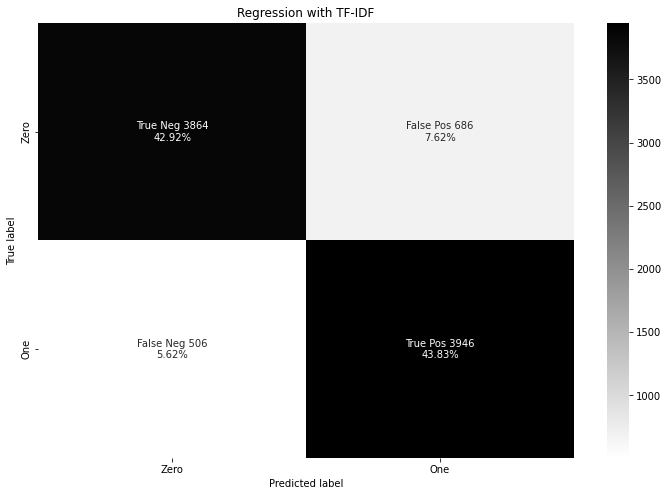

In [ ]:
Y_pred_tfidf = tfidf_clf.predict(X_test_tfidf)
cf_matrix_tfidf = confusion_matrix(Y_test_tfidf,Y_pred_tfidf)
plt_confusion_matrix(cf=cf_matrix_tfidf, title="Regression with TF-IDF")

In [ ]:
l_regression_bow = [precision_bow, 
                    recall_bow, 
                    f1_bow]
                    
l_regression_tfidf = [precision_tfidf, 
                    recall_tfidf, 
                    f1_tfidf]

l_regression_results = [l_regression_bow, l_regression_tfidf]
l_regression_df = pd.DataFrame(l_regression_results,
                      index = ['BoW', 'TF-IDF'],
                      columns = ['Precision', 'Recall', 'F1-Score'])

l_regression_df.style.set_caption("Logistic Regression Experiments")
l_regression_df.style

,Precision,Recall,F1-Score
BoW,0.850107,0.850051,0.849904
TF-IDF,0.854925,0.854826,0.854581


## **Summary**

For the classification I use logistic regression experimenting with the parameters solver, penalty, C.
* **Solver**: The solver I experiment with are **newton-cg, lbfgs, liblinear**.
I don’t use sag and saga, because the only benefit they have is faster convergence. The data aren’t too many and so there is no need for greater speed, while scores are more important to maximize.
5
* **Penalty**: As penalties I use the values **l1**, **l2**, **none**. Penalized logistic
regression imposes a penalty to the logistic model for having too many
variables. This results in shrinking the coefficients of the less contributive
variables toward zero.
* **C**: The C values i used are **0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,
100**. A high value of C tells the model to give more weight to the training
data. A lower value of C will indicate the model to give complexity more
weight at the cost of fitting the data

I use GridSearchCV for finding the optimal parameters of Logistic Regression.
As scoring metric I use the F1 score. Using grid search with the several combina￾tions of parameters I mentioned I received the warning that lbgfs didn’t converge
in many cases, which is one of the solver’s drawback (it is unsafeguarded, it may
not converge to anything). Another factor to take into consideration is scaling,
but the most accepted idea is that bag-of-words, Tf-Idf should be left as are.
So as to overcome this problem, I increased the parameter max iter, which is the maximum number of iterations
taken for the solvers to converge to 500. Grid search result for **bag of words**
showed that the best hyperparameters to use for logistic regression are **C: 0.1,
penalty: l2, solver: lbfgs**. Although lbgfs uses estimation to the inverse
Hessian matrix, which lead to relatively performing the best compared to other
methods especially because it saves a lot of memory, it seem that this solver was
better that the other solvers in maximizing the F1 score. Grid search result for
**TF-IDF** showed that the best hyperparameters to use for logistic regression
are **C: 1, penalty: l1, solver: liblinear**. Liblinear is recommended when
you have high dimension dataset (recommended for solving large-scale classi￾fication problems). Furthermore,
I use cross validation, to improve model prediction. Finally, we conclude that TF-IDF method with the best hyperparameters
is slightly better that Bag Of Words.
